In [1]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transactions = pd.read_excel(r"C:\Users\admin\Downloads\KPMG\KPMG_VI_New_raw_data_update_final1.xlsx", sheet_name='Transactions')
new_customer_lists = pd.read_excel(r"C:\Users\admin\Downloads\KPMG\KPMG_VI_New_raw_data_update_final1.xlsx", sheet_name='NewCustomerList')
customer_demographic = pd.read_excel(r"C:\Users\admin\Downloads\KPMG\KPMG_VI_New_raw_data_update_final1.xlsx", sheet_name='CustomerDemographic')
customer_address = pd.read_excel(r"C:\Users\admin\Downloads\KPMG\KPMG_VI_New_raw_data_update_final1.xlsx", sheet_name='CustomerAddress')

In [3]:
customer_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

# Droping 'first_name', 'last_name', 'default', 'job_title' 

In [4]:
customer_demographic = customer_demographic.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)

# Replacing 'F', 'Femal' to 'Female',  'M' to 'Male' and 'U' to 'Unknown'

In [5]:
customer_demographic['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
customer_demographic['gender'].replace('M', 'Male', inplace=True)
customer_demographic['gender'].replace('U', 'Unknown', inplace=True)

In [6]:
customer_demographic.shape

(4000, 9)

In [7]:
customer_demographic_clean=customer_demographic.dropna()

In [8]:
customer_demographic_clean.shape

(3257, 9)

# Feature Engineering 

In [9]:
customer_demographic_clean['age'] = (dt.datetime.now() - customer_demographic_clean['DOB']) / np.timedelta64(1, 'Y')
customer_demographic_clean['age_class'] = ((round(customer_demographic_clean['age'] / 10)) * 10).astype(int)
customer_demographic_clean.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_class
0,1,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0,67.041603,70
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,N,Yes,16.0,39.862400,40
2,3,Male,61,1954-01-20,Property,Mass Customer,N,Yes,15.0,66.767812,70
3,4,Male,33,1961-10-03,IT,Mass Customer,N,No,7.0,59.066080,60
5,6,Male,35,1966-09-16,Retail,High Net Worth,N,Yes,13.0,54.113206,50


In [10]:
customer_address.head()
customer_address.shape

(3999, 6)

In [11]:
customer_address['state'].replace('New South Wales', 'NSW', inplace=True)
customer_address['state'].replace('Victoria', 'VIC', inplace=True)


In [12]:
customer_address_clean = customer_address.dropna()
customer_address_clean .head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [13]:
new_addr = pd.merge(customer_demographic_clean, customer_address_clean, left_index=True, right_index=True)

In [14]:
new_addr.shape

(3257, 17)

In [15]:
new_addr= new_addr.dropna()
new_addr.head()

,customer_id_x,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation
0,1,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0,67.041603,70,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,N,Yes,16.0,39.862400,40,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,3,Male,61,1954-01-20,Property,Mass Customer,N,Yes,15.0,66.767812,70,4,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Male,33,1961-10-03,IT,Mass Customer,N,No,7.0,59.066080,60,5,17979 Del Mar Point,2448,NSW,Australia,4
5,6,Male,35,1966-09-16,Retail,High Net Worth,N,Yes,13.0,54.113206,50,7,4 Delaware Trail,2210,NSW,Australia,9


In [16]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


# Converting 'product_first_sold_date' column to date time


In [17]:
transactions['product_first_sold_date'] = pd.TimedeltaIndex(transactions['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12


In [18]:
transactions_clean = transactions.dropna()
transactions_clean.shape

(19445, 13)

# Feature Enginerring 'last_purchase_days_ago' and 'profit'

In [19]:
most_recent_purchase = transactions_clean['transaction_date'].max()
transactions_clean['last_purchase_days_ago'] = most_recent_purchase - transactions_clean['transaction_date']
transactions_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
transactions_clean['profit'] = transactions_clean['list_price'] - transactions_clean['standard_cost']
transactions_clean.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,308.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,223.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,75.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,121.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,90.0,1055.82


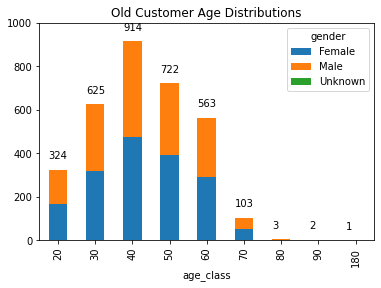

In [20]:
new_addr.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_addr.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Customer Age Distributions')
plt.show()

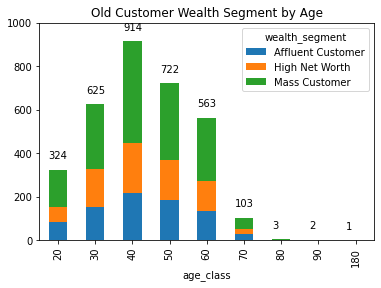

In [63]:
new_addr.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_addr.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Customer Wealth Segment by Age')
plt.show()

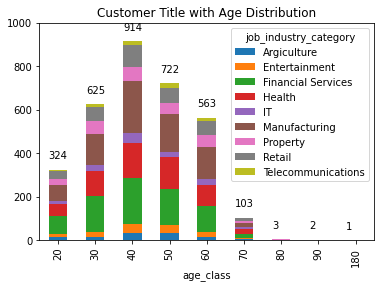

In [22]:
new_addr.groupby('age_class')['job_industry_category'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_addr.groupby('age_class') \
                      .agg({'job_industry_category': lambda x: len(x)})['job_industry_category']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title with Age Distribution')
plt.show()

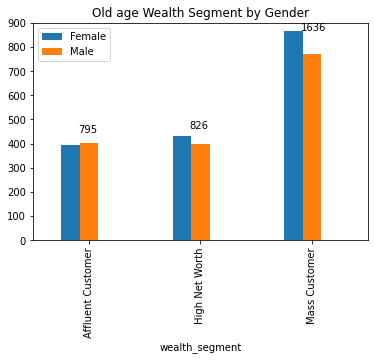

In [66]:
    new_addr.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_addr.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old age Wealth Segment by Gender')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

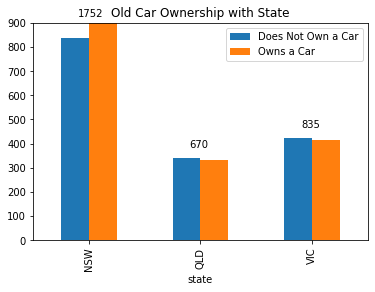

In [24]:
new_addr.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_addr.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title( 'Old Car Ownership with State')

plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

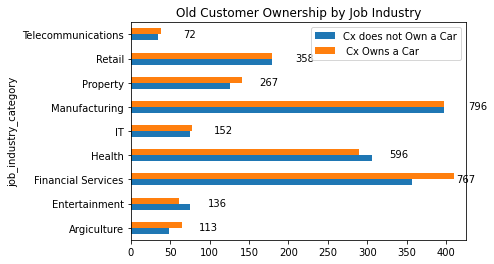

In [25]:
new_addr.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(new_addr.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Customer Ownership by Job Industry')
plt.legend(['Cx does not Own a Car', ' Cx Owns a Car'], loc='upper right')
plt.show()

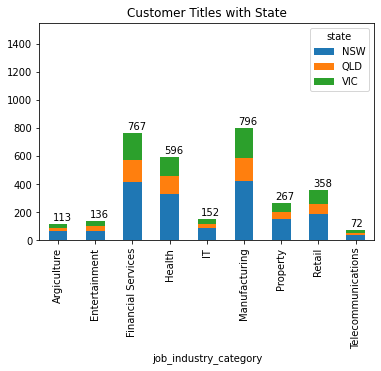

In [26]:
new_addr.groupby('job_industry_category')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_addr.groupby('job_industry_category') \
                      .agg({'state': lambda x: len(x)})['state']):plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

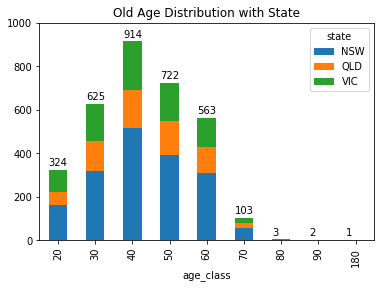

In [27]:
new_addr.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_addr.groupby('age_class').agg({'age': lambda x: len(x)})['age']):plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()

In [28]:
c = new_addr.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
c

,count
gender,
Female,81136
Male,78540
Unknown,59


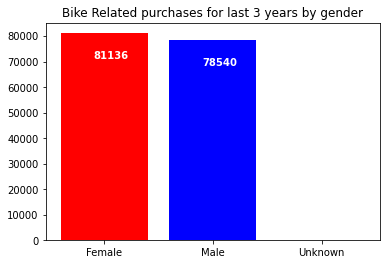

In [62]:
labels = ['Female', 'Male', 'Unknown']
plt.bar(labels, c['count'], color=['red','blue'])
for i, v in enumerate(c['count']):plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Bike Related purchases for last 3 years by gender')
plt.show()

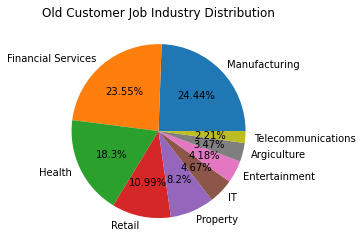

In [30]:
new_addr.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Customer Job Industry Distribution')
plt.ylabel('')
plt.show()

In [31]:
new_customer_lists.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.98,1.225,1.53125,1.301562,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.04,1.040,1.30000,1.105000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.60,0.600,0.60000,0.600000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.82,1.025,1.02500,1.025000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.520,0.65000,0.650000,4,4,1.703125


In [32]:
new_customer_lists.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [33]:
new_customer_lists.duplicated().sum()

0

In [34]:
new_customer_lists.shape

(1000, 23)

In [35]:
new_cust_list_clean = new_customer_lists.dropna()
new_cust_list_clean

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.98,1.225,1.53125,1.301562,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.04,1.040,1.30000,1.105000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.60,0.600,0.60000,0.600000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.82,1.025,1.02500,1.025000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.520,0.65000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.44,0.440,0.44000,0.440000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,1.10,1.100,1.37500,1.168750,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.94,1.175,1.17500,1.175000,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.64,0.800,0.80000,0.680000,997,997,0.357000


In [36]:
new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)
new_cust_list_clean.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.98,1.225,1.53125,1.301562,1,1,1.718750,63.293410,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,1.04,1.040,1.30000,1.105000,1,1,1.718750,50.600473,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.60,0.600,0.60000,0.600000,1,1,1.718750,46.165064,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.82,1.025,1.02500,1.025000,4,4,1.703125,41.746082,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.52,0.520,0.65000,0.650000,4,4,1.703125,55.098855,60


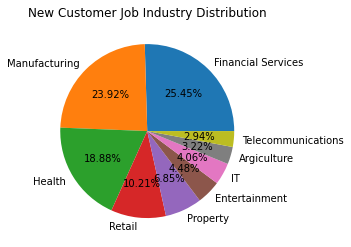

In [37]:
new_cust_list_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Customer Job Industry Distribution')
plt.ylabel('')
plt.show()

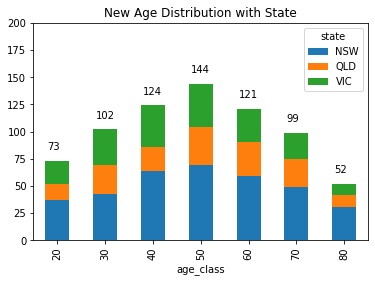

In [38]:
new_cust_list_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()

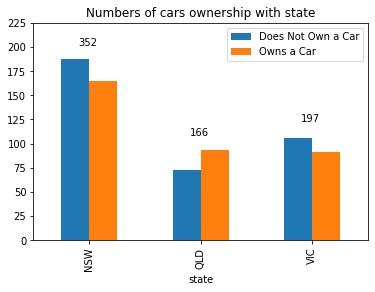

In [67]:
new_cust_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('Numbers of cars ownership with state')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

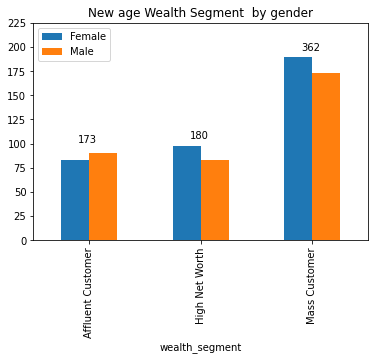

In [65]:
new_cust_list_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New age Wealth Segment  by gender')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

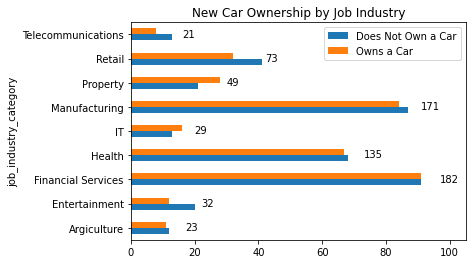

In [41]:
new_cust_list_clean.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

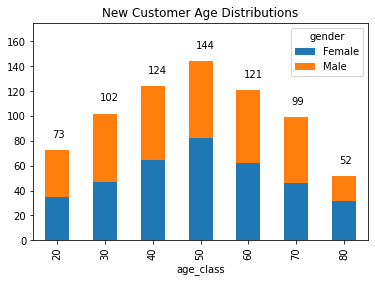

In [42]:
new_cust_list_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Customer Age Distributions')
plt.show()

In [43]:
 [transactions_clean['last_purchase_days_ago'] > 365].shape


(0, 15)

In [44]:
rfmTable = transactions_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

In [45]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [46]:
rfmTable.shape


(3492, 3)

In [47]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [48]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [49]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [50]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [51]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [52]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic
3,102.0,7,3290.210000,4,3,3,433,10,basic
4,195.0,2,220.570000,4,4,4,444,12,basic
5,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic
3498,127.0,6,3147.330000,4,3,3,433,10,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic


In [54]:
addr_demo_txns1 = pd.merge(rfmSeg, new_addr, left_index=True, right_index=True)
addr_demo_txns1.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title',
       'customer_id_x', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'age_class', 'customer_id_y', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [56]:
addr_demo_txns1.shape


(2854, 26)

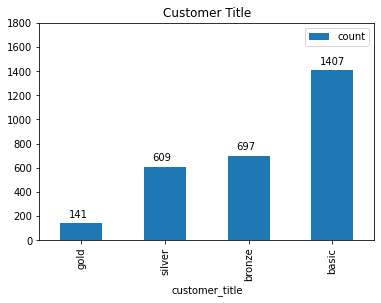

In [57]:
customer_titles_df = addr_demo_txns1.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

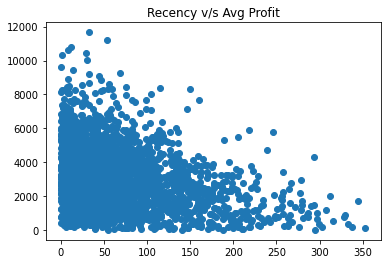

In [58]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns1['monetary_value'])
plt.title('Recency v/s Avg Profit')
plt.show()

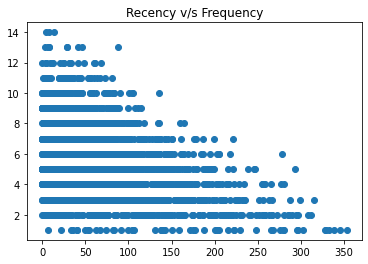

In [59]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns1['frequency'])
plt.title('Recency v/s Frequency')
plt.show()

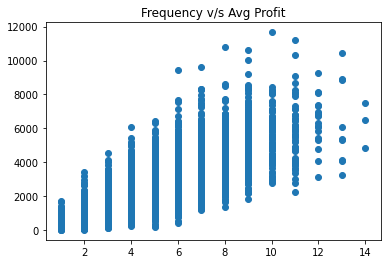

In [74]:
plt.scatter(addr_demo_txns1['frequency'], addr_demo_txns1['monetary_value'])
plt.title('Frequency v/s Avg Profit')
plt.show()

In [76]:
addr_demo_txns1['customer_segment'] = addr_demo_txns1['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
addr_demo_txns1

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id_x,...,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation,customer_segment
1,7.0,11,3018.09,1,1,3,113,5,silver,2,...,16.0,39.862400,40,2,6 Meadow Vale Court,2153,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,basic,3,...,15.0,66.767812,70,4,0 Holy Cross Court,4211,QLD,Australia,9,Losing
3,102.0,7,3290.21,4,3,3,433,10,basic,4,...,7.0,59.066080,60,5,17979 Del Mar Point,2448,NSW,Australia,4,Losing
5,16.0,6,2394.94,1,3,2,132,6,silver,6,...,13.0,54.113206,50,7,4 Delaware Trail,2210,NSW,Australia,9,Recent
6,64.0,5,3946.55,3,2,3,323,8,basic,7,...,11.0,44.675641,40,8,49 Londonderry Lane,2650,NSW,Australia,4,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,basic,3497,...,18.0,34.485151,30,3501,16 Carberry Pass,2119,NSW,Australia,11,Losing
3497,52.0,3,1648.32,3,4,4,344,11,basic,3498,...,5.0,24.984613,20,3502,12 Elgar Place,2155,NSW,Australia,10,Inactive
3498,127.0,6,3147.33,4,3,3,433,10,basic,3499,...,7.0,41.362773,40,3503,8749 Menomonie Point,2122,NSW,Australia,11,Losing
3499,51.0,7,4955.25,3,3,1,331,7,basic,3500,...,17.0,53.269931,50,3504,18072 American Parkway,3195,VIC,Australia,10,Average


In [83]:
addr_demo_txns1['wealth_segment']

1           Mass Customer
2           Mass Customer
3           Mass Customer
5          High Net Worth
6       Affluent Customer
              ...        
3496    Affluent Customer
3497        Mass Customer
3498        Mass Customer
3499    Affluent Customer
3500        Mass Customer
Name: wealth_segment, Length: 2854, dtype: object

In [84]:
addr_demo_txns1.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title',
       'customer_id_x', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'age_class', 'customer_id_y', 'address',
       'postcode', 'state', 'country', 'property_valuation',
       'customer_segment'],
      dtype='object')